<img src=https://is3-ssl.mzstatic.com/image/thumb/Purple126/v4/6b/99/f0/6b99f09a-962c-ca32-3083-6fd705bb3057/AppIcon-0-1x_U007emarketing-0-7-0-sRGB-85-220.png/246x0w.webp
     style="height:130px; width:150px; float: left" >

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Reading Dataset

In [2]:
uber=pd.read_csv('Uber Data.csv')

In [3]:
uber.head(15)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
#Summary of data
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
#Filling null values for driver id
uber["Driver id"].fillna("Unknown",inplace=True)

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   int64 
 1   Pickup point       6745 non-null   object
 2   Driver id          6745 non-null   object
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     2831 non-null   object
dtypes: int64(1), object(5)
memory usage: 316.3+ KB


## Pickup point count with pickup location

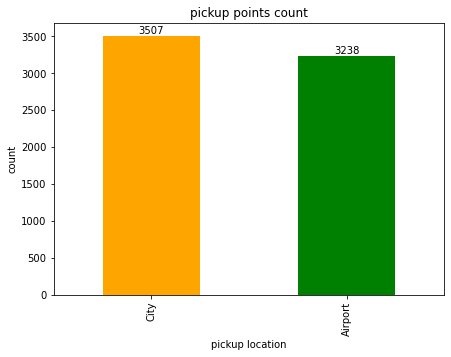

In [7]:
plt.figure(figsize=(7,5))
ax=uber['Pickup point'].value_counts().plot(kind='bar',color=['orange','green'])
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('count')
plt.xlabel('pickup location')
plt.title('pickup points count')
plt.show()

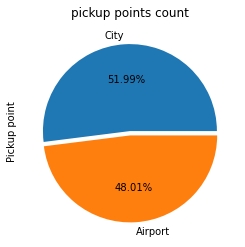

In [8]:
uber['Pickup point'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.05])
plt.title('pickup points count')
plt.show()

## Trip Status

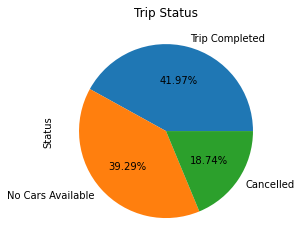

In [9]:
uber['Status'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Trip Status')
plt.show()

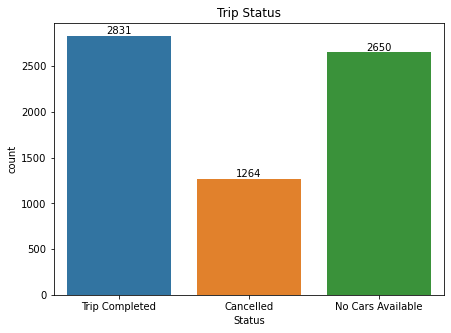

In [10]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=uber,x='Status')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Trip Status')
plt.show()

## Pickup point vs Trip Status

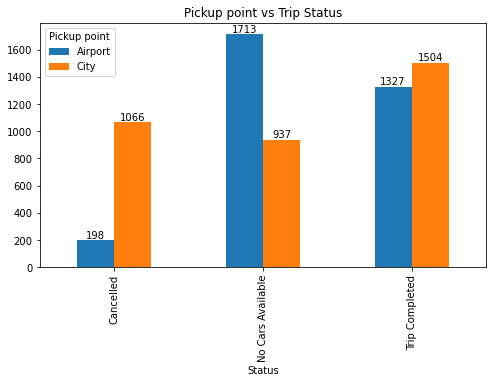

In [11]:
ax=pd.crosstab(uber['Status'],uber['Pickup point']).plot(kind='bar',figsize=(8,4.5))
for i in ax.containers:
    ax.bar_label(i)
plt.title('Pickup point vs Trip Status')
plt.show()

## Coverting Date in String format to timestamp

In [12]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [13]:
uber['Request timestamp']

0           11/7/2016 11:51
1           11/7/2016 17:57
2            12/7/2016 9:17
3           12/7/2016 21:08
4       13-07-2016 08:33:16
               ...         
6740    15-07-2016 23:49:03
6741    15-07-2016 23:50:05
6742    15-07-2016 23:52:06
6743    15-07-2016 23:54:39
6744    15-07-2016 23:55:03
Name: Request timestamp, Length: 6745, dtype: object

In [14]:
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])

In [15]:
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])

In [16]:
uber['Request timestamp']

0      2016-11-07 11:51:00
1      2016-11-07 17:57:00
2      2016-12-07 09:17:00
3      2016-12-07 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [17]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


## Extracting weekdays from timestamp

In [18]:
uber['weekdays']=uber['Request timestamp'].dt.strftime("%A")

## Weekdays vs Trip Count

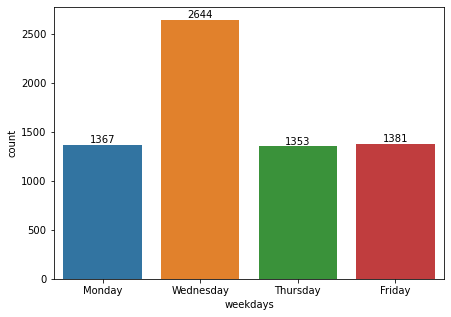

In [19]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=uber,x='weekdays')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Weekdays vs Trip Count with Status

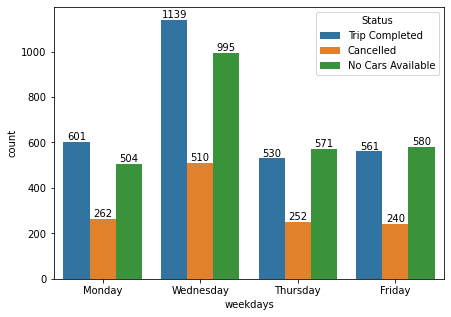

In [20]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=uber,x='weekdays',hue='Status')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Weekdays vs Trip count with pickup point

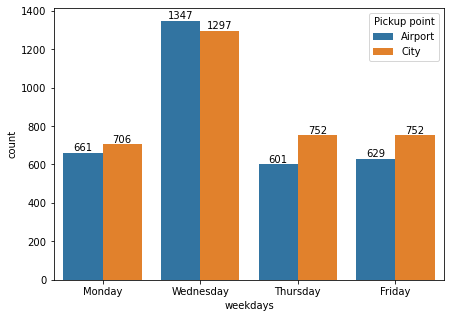

In [21]:
plt.figure(figsize=(7,5))
ax=sns.countplot(data=uber,x='weekdays',hue='Pickup point')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

## Extracting hours from timestamp

In [22]:
uber['hours']=uber['Request timestamp'].dt.strftime("%H")

In [23]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,weekdays,hours
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,09
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,08


## Trip Count per Hours

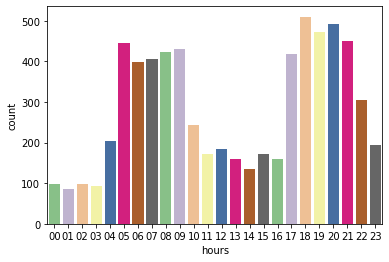

In [24]:
sns.countplot(data=uber,x=uber['hours'].sort_values(),palette='Accent')
plt.show()

### By Visualizing the data we get to know about some useful insights like:
* **Less than 50% trips are completed** and in almost **40% cases cars are not available** in customer’s area of pickup.
* Trip count is highest on **Wednesday**. 
* Very less number of cars are available around **Airport pickup** location.
* **Highest number** of trips are booked around **6 pm to 8 pm**.

### After Analyzing above insights company should focus on following points:
* Company should **increase number of cars present around airport** pickup location as customers are regularly checking for cars from airport.
* Company should **decrease fare around city pickup location** as **booking cancellation rate is high** in this area.
* Company should try to make available **more cars on Wednesday** in order to satisfy customer’s needs.


### Thank You For Visiting